In [7]:
import numpy as np
import matplotlib.pyplot as plt

# !pip install folium
import folium



from collections import Counter

In [3]:
# DATEBASE_NAME = '18_SEP_2022'
# path = pathlib.Path(f"trans_data_{DATEBASE_NAME}/")
# files_list = list(path.iterdir())

# files_list = sorted(files_list)

# len(files_list)

In [5]:
len(fpath_list)//10

5788

In [4]:
import os
import json
import pandas as pd
import zipfile
from concurrent.futures import ThreadPoolExecutor
from tqdm.auto import tqdm
from datetime import datetime, timedelta
import pathlib
import shutil


def read_json_TPE(f_path): 
    try:
        with open(f_path, 'r', encoding = 'utf-8') as file: 
            return (json.load(file), None)
    except Exception as e: 
        print(f"Unable to open : {f_path}")
        print(f"Exception is '{e}'")
        return (None, file)
    

def get_df(jsons_content):
    data = list()
    for r in jsons_content: 
        if r[1] is None:
            data += [val for _, val in r[0].items()]

    df = pd.DataFrame(data)
    print(f"Total duplicates are {df.duplicated().value_counts().get(True, 0)} of {len(df)}")   
    return df.drop_duplicates()


def folder_to_df(folder):
    fpaths_list = list(folder.iterdir())
    fpaths_list = sorted(fpaths_list)
    
    with ThreadPoolExecutor(max_workers=40) as executor:
        fpath_list = fpaths_list
        results = list(tqdm(executor.map(read_json_TPE, fpath_list), 
                            total=len(fpath_list), 
                            miniters=int(len(fpath_list)//10),
                            desc=f"Read {str(folder)} to write df", ascii=True 
                           )
                      )
            
    df = get_df(results)
    df.to_csv(f"tables\data_for_{str(folder)[11:]}.csv", 
              encoding='utf-8', index=False, header='true')


def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in tqdm(files, position=0, leave=True, desc=f"Zip {path}"):
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))


def write_zip_archive(folder): 
    zip_fname = f"archives/{folder}.zip"
    with zipfile.ZipFile(zip_fname, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipdir(f"{folder}", zipf)
    


folders_list = [p for p in pathlib.Path().iterdir() if 'trans_data_' in str(p)]
folders_list = sorted(folders_list, key=lambda x: datetime.strptime(str(x)[11:], '%d_%b_%Y'))[:-1]

pbar = tqdm(folders_list, leave=False)
for folder in pbar:
    folder_to_df(folder)
    write_zip_archive(folder)
    print(f"Start delete {folder}")
    shutil.rmtree(folder)
    print(f"{folder} is deleted")

  0%|          | 0/2 [00:00<?, ?it/s]

Read trans_data_30_SEP_2022 to write df:   0%|          | 0/57584 [00:00<?, ?it/s]

Total duplicates are 198 of 272365


Zip trans_data_30_SEP_2022:   0%|          | 0/57584 [00:00<?, ?it/s]

Read trans_data_01_OCT_2022 to write df:   0%|          | 0/55162 [00:00<?, ?it/s]

Total duplicates are 1612 of 185718


Zip trans_data_01_OCT_2022:   0%|          | 0/55162 [00:00<?, ?it/s]

In [2]:
# ziph

In [67]:
df = get_df(results)

Total duplicates are 2387 of 173295


In [73]:
folder

WindowsPath('trans_data_18_SEP_2022')

In [15]:
df = pd.read_table('tables/data_for_30_SEP_2022.csv', sep=',')

c:\program files\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
df.keys()

Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [ ]:
'id', 'imei', 'name', 'stateCode', 'stateName', , 
        'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'

In [ ]:
gpsdata
'lat', 'lng', 'speed', 'orientation', 'gpstime', 'inDepo', | 'routeId',
entity 
'entityId', 'imei', 'name', 'busNumber', | 'perevId', 'routeId'
owner 
"perevId", 'perevName', 'remark'
route
'routeId', 'routeName', 'routeColour',

stateCode stateName

In [17]:
df['imei'].value_counts() 

355227046453387    4782
355228042084283    4753
355227045539541    4328
355227046450904    4197
355227046283032    4177
                   ... 
355227046451043      73
355227046451399      23
355227046451670      21
355227046451506      18
355228043198777       6
Name: imei, Length: 97, dtype: int64

In [18]:
# sel_df = df[df["imei"] == 355227045371655][['imei', 'busNumber', "name"]].value_counts()
# sel_df = df[['imei', 'busNumber', "name"]].value_counts()
sel_df = df[['busNumber']].value_counts()

sel_df


#   

busNumber
3627         4512
1032         4222
6159         4185
6001         4164
1181         3935
             ... 
335             5
1098            4
364             4
8716            3
1031            3
Length: 164, dtype: int64

In [20]:
df[df["imei"] == '']

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes


In [21]:
plt.plot(total_records_num)

NameError: name 'total_records_num' is not defined

In [12]:
sum_df['imei'].value_counts()[:10]

355227046638821    5016
355227046450946    4328
355227045539921    4174
355227046504098    4052
355227045600871    3920
355227046447371    3870
355227046451290    3833
355227045600988    3829
355227045540192    3800
355227046451530    3591
Name: imei, dtype: int64

In [173]:
sum_df['imei'].value_counts()[-20:-10]

355227045371655    554
355227046451464    461
355227046505244    390
355227046283032    312
355227045600830    301
355227045369527    298
355227046451332    290
355227046507810    230
355227045540127    185
355227045540234    102
Name: imei, dtype: int64

In [25]:
vehicle_df = df[df['imei'] == 355227045600988]
# vehicle_df = sum_df[sum_df['imei'] == '355227045369527']

vehicle_df.head(5)

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
2,243,355227045600988,A158,used,used,48.276937,25.943095,13.0,160.25,2022-09-29 23:00:05,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
3,243,355227045600988,A158,used,used,48.275840,25.943697,15.0,158.38,2022-09-29 23:00:35,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
4,243,355227045600988,A158,used,used,48.275478,25.943930,14.8,161.61,2022-09-29 23:00:45,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
5,243,355227045600988,A158,used,used,48.275170,25.944118,10.5,163.50,2022-09-29 23:00:55,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2
6,243,355227045600988,A158,used,used,48.274850,25.944343,16.6,158.42,2022-09-29 23:01:05,33,8T,coral,False,324,6,ЧТУ,Тролейбус 324 DNSNK,True,2


In [27]:
vehicle_df[['routeName', 'routeColour']].value_counts()

routeName  routeColour
8T         coral          2057
dtype: int64

In [28]:
import matplotlib as mpl

cm = mpl.cm.get_cmap('jet')
# viridis = mpl.colormaps['viridis'].resampled(8)

In [32]:
trace = vehicle_df[['lat', 'lng']].values

m = folium.Map(
    location=np.mean(trace, axis=0), 
    zoom_start=12, height='50%', width='55%'
    )

plot_coloured_route(trace, m)

m

In [31]:
def rgb_to_hex(r, g, b):
    return f'{r:02x}{g:02x}{b:02x}'


def plot_coloured_route(route, folium_map, color_map=mpl.cm.get_cmap('jet'), bins=10):
    bins = min(bins, len(route))
    
    lspace = np.linspace(0, len(route), num=bins+1, dtype=int)
    
    for i, (lb, rb) in enumerate(zip(lspace[:-1], lspace[1:]) ):
        clr = rgb_to_hex(*tuple(map(lambda x : int(x*255), cm(i/bins) ))[:3])
        folium.PolyLine(
            route[lb:rb+1, :],
            color=f"#{clr}", weight=2,
            opacity=0.8
        ).add_to(folium_map)

In [16]:
# result_list

In [20]:
# df.value_counts()
'id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'
df.keys()

Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [34]:
# df['gpstime'].value_counts()
min(vehicle_df['gpstime']), max(vehicle_df['gpstime'])

('2022-09-29 23:00:05', '2022-09-30 22:55:38')

In [37]:
vehicle_df.keys()

Index(['id', 'imei', 'name', 'stateCode', 'stateName', 'lat', 'lng', 'speed',
       'orientation', 'gpstime', 'routeId', 'routeName', 'routeColour',
       'inDepo', 'busNumber', 'perevId', 'perevName', 'remark', 'online',
       'idBusTypes'],
      dtype='object')

In [38]:
len(vehicle_df['gpstime'].unique()), len(vehicle_df['gpstime'])
len(vehicle_df[['lat', 'lng']].unique()), len(vehicle_df['gpstime'])

AttributeError: 'DataFrame' object has no attribute 'unique'

In [39]:
updata_tm = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() 
             for dt in vehicle_df['gpstime'].unique() ]
updata_tm_np = np.array(updata_tm)

In [40]:
max(updata_tm_np[1:] - updata_tm_np[:-1])

15532.0

In [41]:
updata_tm_np[1:] - updata_tm_np[:-1]

array([ 30.,  10.,  10., ..., 300., 300., 301.])

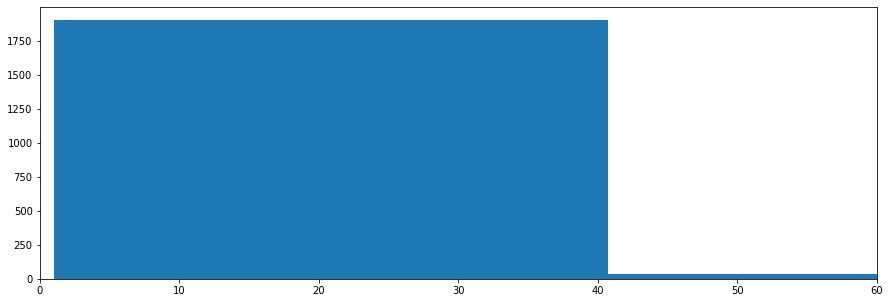

In [42]:
plt.figure(figsize=(15, 5))
plt.hist(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)
plt.xlim(0, 60)
plt.show()

In [36]:
df.keys()

NameError: name 'df' is not defined

In [119]:
d = datetime.now()

In [121]:
d.microsecond > 1_000

343015

In [51]:
updata_tm_np[1:]-updata_tm_np[0]

array([3.0000e+01, 4.0000e+01, 5.0000e+01, ..., 8.5532e+04, 8.5832e+04,
       8.6133e+04])

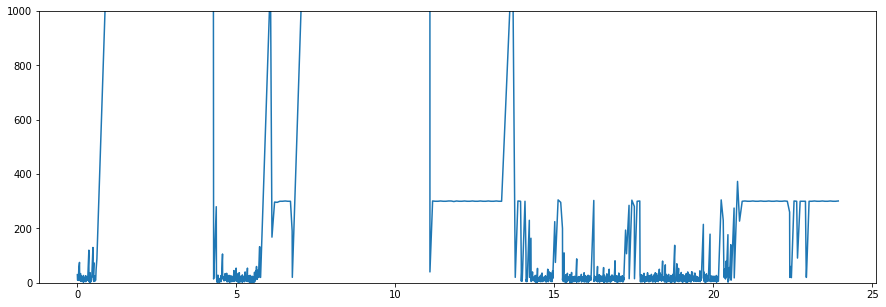

In [52]:
plt.figure(figsize=(15, 5))
plt.plot((updata_tm_np[1:]-updata_tm_np[0])/3600, updata_tm_np[1:] - updata_tm_np[:-1])
plt.ylim(0, 1000)
plt.show()

In [44]:
np.histogram(updata_tm_np[1:] - updata_tm_np[:-1], bins=391)

(array([1904,   34,    9,    5,    6,    6,    3,   82,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
datetime.strftime('%Y-%m-%d %H;%M;%S')

In [54]:
datetime.strptime('2022-09-05 22:09:58', '%Y-%m-%d %H:%M:%S').timestamp()

1662404998.0

In [35]:
df.iloc[-1]

id                              75
imei               355227045369527
name                            A6
stateCode                     used
stateName                     used
lat                      48.326433
lng                      25.930175
speed                        000.0
orientation                 000.00
gpstime        2022-09-05 22:09:58
routeId                         17
routeName                       23
routeColour                    red
inDepo                       False
busNumber                     3557
perevId                         12
perevName              Vitaliy2019
remark                 3557 DNSNK 
online                        True
idBusTypes                       1
Name: 47737, dtype: object

In [109]:
# for f_path in files_list[:1]:
#     with open(f_path, 'r', encoding = 'utf-8') as file: 
#         response = json.load(file)
        
# for _ in range(5):
#     with open("test_mult_w.json", 'a') as out_f: 
#         json.dump(response, out_f, ensure_ascii=False)
#         out_f.write('\n')

In [41]:
for _ in range(5):
    with open("test_mult_w.json", 'a') as out_f: 
        json.dump(response, out_f, ensure_ascii=False)
        out_f.write('\n')